# Semantic Link Data Preparation 

In [2]:
%pip install -U semantic-link --q



StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 8, Finished, Available, Finished)


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



### Install Dependencies for Semantic Link

Modify **workspace** and **semantic model** names

In [3]:
import sempy.fabric as fabric 
import pandas as pd
from sempy.fabric import FabricDataFrame
from sempy.dependencies import plot_dependency_metadata


#workspace 
ws = fabric.get_workspace_id()

#semantic model 
ds = "delivery semantic model"

StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 10, Finished, Available, Finished)

### List all tables in our dataset
List the tables in the dataset called **delivery data semantic model**

In [4]:
tables_fdf = fabric.list_tables(ds) 
tables_fdf

StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 11, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type
0,warehouses,,False,,Table
1,carriers,,False,,Table
2,shipments,,False,,Table


In [5]:
fabric.list_columns(ds) 

StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 12, Finished, Available, Finished)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Alternate Of Base Column,Alternate Of Base Table,Modified Time
0,warehouses,warehouse_id,,Data,Int64,False,0,warehouse_id,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:09:39
1,warehouses,warehouse_name,,Data,String,False,,warehouse_name,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:08:34
2,warehouses,origin_region,,Data,String,False,,origin_region,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:08:34
3,carriers,carrier_id,,Data,Int64,False,0,carrier_id,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:09:30
4,carriers,carrier_name,,Data,String,False,,carrier_name,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:08:34
5,carriers,speed_factor,,Data,Double,False,,speed_factor,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:09:30
6,shipments,order_to_ship_days,,Data,Double,False,,order_to_ship_days,,,...,False,None,Sum,True,Default,Ready,,None,None,2025-11-13 06:08:34
7,shipments,ship_dayofweek,,Data,Int64,False,0,ship_dayofweek,,,...,False,None,Sum,True,Default,Ready,,None,None,2025-11-13 06:08:34
8,shipments,ship_month,,Data,Int64,False,0,ship_month,,,...,False,None,Sum,True,Default,Ready,,None,None,2025-11-13 06:08:34
9,shipments,distance_band,,Data,String,False,,distance_band,,,...,False,None,None,True,Default,Ready,,None,None,2025-11-13 06:08:34


### Looking at the relationships between the tables 
Read measures from Power BI semantic model

StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 13, Finished, Available, Finished)

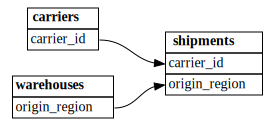

In [6]:
from sempy.relationships import plot_relationship_metadata
plot_relationship_metadata(fabric.list_relationships(workspace=ws, dataset = ds))

### Read Tables from Power BI dataset

Load in the tables from the semantic model for the predictions using DAX

In [11]:
### 🟦 5. Create ML Dataset Using DAX 

print("="*60)
print("LEVERAGE YOUR POWER BI EXPERTISE WITH DAX")
print("="*60)

# Use only columns that exist in your semantic model
ml_dataset_query = """
EVALUATE
ADDCOLUMNS(
    shipments,
    "carrier_name", RELATED(carriers[carrier_name]),
    "carrier_speed_factor", RELATED(carriers[speed_factor]),
    "warehouse_name", RELATED(warehouses[warehouse_name])
)
"""

# Execute DAX query
df = fabric.evaluate_dax(dataset=ds, dax_string=ml_dataset_query)

print(f"✅ Retrieved {len(df):,} rows using DAX RELATED() function")
print(f"✅ Columns: {list(df.columns)}")
print("\n🎯 Same DAX you use in Power BI - now in Python!")

df.head()

StatementMeta(, 63423000-3bec-4e72-8688-653cbb00b435, 18, Finished, Available, Finished)

LEVERAGE YOUR POWER BI EXPERTISE WITH DAX
✅ Retrieved 5,000 rows using DAX RELATED() function
✅ Columns: ['shipments[order_to_ship_days]', 'shipments[ship_dayofweek]', 'shipments[ship_month]', 'shipments[distance_band]', 'shipments[service_level]', 'shipments[order_date]', 'shipments[ship_date]', 'shipments[delivery_date]', 'shipments[delivery_days_actual]', 'shipments[shipment_id]', 'shipments[carrier_id]', 'shipments[warehouse_id]', 'shipments[origin_region]', 'shipments[destination_region]', '[carrier_name]', '[carrier_speed_factor]', '[warehouse_name]']

🎯 Same DAX you use in Power BI - now in Python!


,shipments[order_to_ship_days],shipments[ship_dayofweek],shipments[ship_month],shipments[distance_band],shipments[service_level],shipments[order_date],shipments[ship_date],shipments[delivery_date],shipments[delivery_days_actual],shipments[shipment_id],shipments[carrier_id],shipments[warehouse_id],shipments[origin_region],shipments[destination_region],[carrier_name],[carrier_speed_factor],[warehouse_name]
0,1.507002,4,1,Medium,Ground,2024-01-25,2024-01-26 12:10:05.013333,2024-01-28 21:20:00.650000,2.381894,1251,1,4,Northeast,West,FastShip,0.7,Northeast DC
1,2.513401,0,3,Medium,Ground,2024-03-02,2024-03-04 12:19:17.863333,2024-03-07 15:26:26.316667,3.129959,1252,1,3,South,Midwest,FastShip,0.7,South DC
2,1.580325,5,6,Short,Ground,2024-06-07,2024-06-08 13:55:40.076667,2024-06-10 20:40:29.836667,2.281131,1253,3,1,West,Midwest,SlowShip,1.3,West DC
3,1.701958,0,4,Short,Fast,2024-03-31,2024-04-01 16:50:49.153333,2024-04-02 14:51:43.470000,0.917295,1254,3,3,South,South,SlowShip,1.3,South DC
4,1.283398,4,4,Short,Ground,2024-04-11,2024-04-12 06:48:05.613333,2024-04-12 23:01:57.386667,0.676294,1255,2,3,South,South,StandardShip,1.0,South DC
